In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/Users/ambershen/Desktop/linARG/dx_analysis/figures/2b/data/size_in_memory.csv')
df

,chr,method,size_in_memory_gb
0,1_11_21,linarg,8.209251
1,1_11_21,scipy,477.470264
2,1_11_21,grg,19.404321
3,1-22,linarg,57.977156


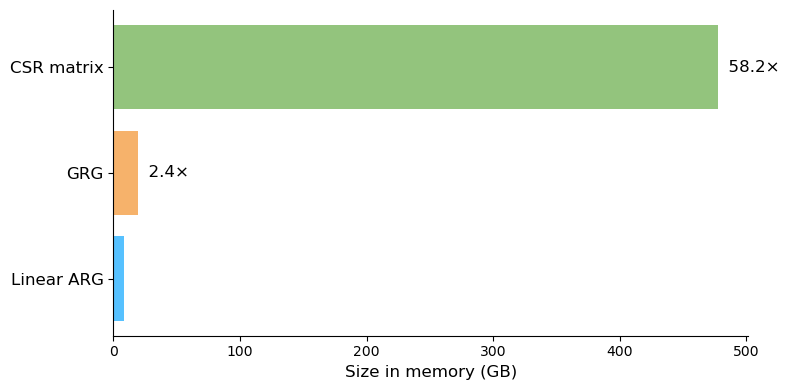

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

methods = ['Linear ARG', 'GRG', 'CSR matrix'][::-1]
size_in_memory = [df.loc[0].size_in_memory_gb, df.loc[2].size_in_memory_gb, df.loc[1].size_in_memory_gb][::-1]

y = np.arange(len(methods))

colors = ['#93c47d', '#f6b26b', '#56C1FF']

fig, ax = plt.subplots(figsize=(8, 4))

# Plot each bar segment individually for full control
for i in range(len(methods)):
    # First subcategory
    ax.barh(y[i], size_in_memory[i], color=colors[i], label='Size in memory (GB)' if i == 0 else "")

# Set y-axis labels and reverse order
ax.set_yticks(y)
ax.set_yticklabels(methods, fontsize=12)
ax.invert_yaxis()

# Labels and title
ax.set_xlabel('Size in memory (GB)', fontsize=12)

linarg_size = size_in_memory[-1]
for i in range(len(size_in_memory)-1):  # Only for scipy and grg
    speedup = size_in_memory[i] / linarg_size
    ax.text(size_in_memory[i] + 0.05, y[i], f"  {speedup:.1f}×", va='center', fontsize=12)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()
plt.show()
